In [1]:
def print_array(name,vector,n=None):
    print(f'Vector {name}, shape: {vector.shape} len: {len(vector)}')
    if n is not None:
        print(f'Primeros {n} elementos: {vector[:n]}')

Vector Número de muestras, shape: (7993344,) len: 7993344
Primeros 10 elementos: [ 9.7285717e-09 -3.3764763e-08  1.9175202e-08  3.3040116e-08
 -3.9637417e-08 -1.4597551e-08  3.7666261e-08 -6.8751005e-09
 -1.4479101e-08  1.2242781e-08]
Tasa de muestreo 44100
Vector Valores fourier, shape: (1025, 15613) len: 1025
Primeros 10 elementos: [[-2.5707430e-09+0.0000000e+00j -1.4868921e-09+0.0000000e+00j
   2.0533043e-10+0.0000000e+00j ... -5.8284925e-08+0.0000000e+00j
   1.8374719e-07+0.0000000e+00j  5.9861435e-07+0.0000000e+00j]
 [ 2.3960829e-09-1.9693225e-10j  3.8705469e-10+1.2693676e-09j
  -1.6708278e-10+3.9448717e-10j ... -1.5803534e-08-7.7847233e-08j
   1.6047268e-07+3.1989092e-07j -6.7259765e-07+9.4972762e-08j]
 [-2.2307620e-09+6.8849877e-11j  8.5272123e-10+2.6991907e-11j
   2.5935504e-10-1.7214923e-10j ...  9.6232739e-08+2.6709047e-08j
  -4.6094320e-07+1.0753034e-08j  7.4037740e-07-6.0718548e-08j]
 ...
 [ 2.4356890e-09+1.2016477e-10j  1.4159740e-11-1.2445694e-09j
   4.8713807e-11+3.73046

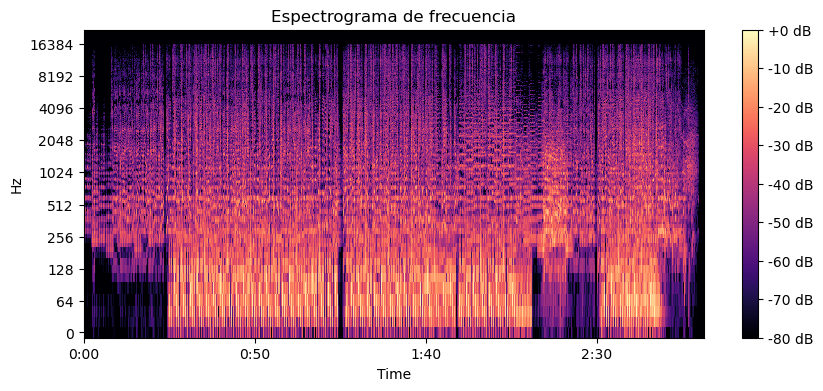

Vector Frecuencias, shape: (1025, 15613) len: 1025
Primeros 10 elementos: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vector Frecuencias dominantes, shape: (1025, 15613) len: 1025
Primeros 10 elementos: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


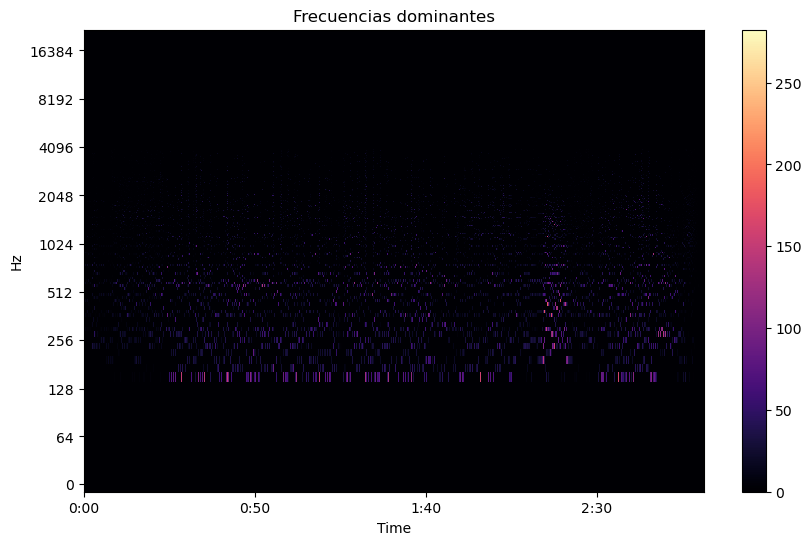

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Cargar el archivo de audio
audio_file = "audio_muestra.mp3"
y, sr = librosa.load(audio_file,sr=None)
print_array('Número de muestras',y,10)
print('Tasa de muestreo',sr)
# Calcular el espectrograma de frecuencia
valores_fouier = librosa.stft(y)
print_array('Valores fourier',valores_fouier,10)

magnitudes= np.abs(valores_fouier)
print_array('Valores magnitudes',magnitudes,10)

D = librosa.amplitude_to_db(magnitudes, ref=np.max)
print_array('Valores D',D,10)

plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de frecuencia')
plt.show()

# Calcular las frecuencias dominantes
frequencies, dominant_frequencies = librosa.piptrack(y=y, sr=sr)

# Imprimir las dimensiones de las frecuencias dominantes
print_array('Frecuencias',frequencies,10)
print_array('Frecuencias dominantes',dominant_frequencies,10)
# Graficar las frecuencias dominantes
plt.figure(figsize=(10, 6))
librosa.display.specshow(dominant_frequencies, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Frecuencias dominantes')
plt.show()